##Quantum Chemistry Calcuration on H2 Molecule energy
On the quantum computer the scalable quantum chemistry is expected as a killer application. Here we introduce the way to calculate the basic molecule energy of H2 molecule using near-term algorithm. It is not scalable at the moment but can learn a lot from the step of the algorithm. Let's see it.

##Install
First let's install required environment

In [0]:
!pip install blueqat openfermionblueqat openfermion

Impor all of these components.

In [0]:
from blueqat import *
from openfermion import *
from openfermionblueqat import*

Here we get the basic molecule info from the bond length of molecule.

In [0]:
def get_molecule(bond_len):
  geometry = [('H',(0.,0.,0.)),('H',(0.,0.,bond_len))]
  
  description = format(bond_len)
  molecule = MolecularData(geometry, "sto-3g",1,description=description)
  
  molecule.load()
  return molecule

In [0]:
m = get_molecule(0.4)

Just try to check the basic molecule energy on H2 as bond length of 0.4

In [6]:
m.get_molecular_hamiltonian()

() 1.322943021475
((0, 1), (0, 0)) -1.4820918858979102
((1, 1), (1, 0)) -1.4820918858979102
((2, 1), (2, 0)) -0.1187350527865787
((3, 1), (3, 0)) -0.1187350527865787
((0, 1), (0, 1), (0, 0), (0, 0)) 0.36843967630348756
((0, 1), (0, 1), (2, 0), (2, 0)) 0.08225771204699692
((0, 1), (1, 1), (1, 0), (0, 0)) 0.36843967630348756
((0, 1), (1, 1), (3, 0), (2, 0)) 0.08225771204699692
((0, 1), (2, 1), (0, 0), (2, 0)) 0.082257712046997
((0, 1), (2, 1), (2, 0), (0, 0)) 0.3626667179796745
((0, 1), (3, 1), (1, 0), (2, 0)) 0.082257712046997
((0, 1), (3, 1), (3, 0), (0, 0)) 0.3626667179796745
((1, 1), (0, 1), (0, 0), (1, 0)) 0.36843967630348756
((1, 1), (0, 1), (2, 0), (3, 0)) 0.08225771204699692
((1, 1), (1, 1), (1, 0), (1, 0)) 0.36843967630348756
((1, 1), (1, 1), (3, 0), (3, 0)) 0.08225771204699692
((1, 1), (2, 1), (0, 0), (3, 0)) 0.082257712046997
((1, 1), (2, 1), (2, 0), (1, 0)) 0.3626667179796745
((1, 1), (3, 1), (1, 0), (3, 0)) 0.082257712046997
((1, 1), (3, 1), (3, 0), (1, 0)) 0.362666717979674

Get as fermion operator

In [7]:
get_fermion_operator(m.get_molecular_hamiltonian())

1.322943021475 [] +
-1.4820918858979102 [0^ 0] +
0.36843967630348756 [0^ 0^ 0 0] +
0.08225771204699692 [0^ 0^ 2 2] +
0.36843967630348756 [0^ 1^ 1 0] +
0.08225771204699692 [0^ 1^ 3 2] +
0.082257712046997 [0^ 2^ 0 2] +
0.3626667179796745 [0^ 2^ 2 0] +
0.082257712046997 [0^ 3^ 1 2] +
0.3626667179796745 [0^ 3^ 3 0] +
0.36843967630348756 [1^ 0^ 0 1] +
0.08225771204699692 [1^ 0^ 2 3] +
-1.4820918858979102 [1^ 1] +
0.36843967630348756 [1^ 1^ 1 1] +
0.08225771204699692 [1^ 1^ 3 3] +
0.082257712046997 [1^ 2^ 0 3] +
0.3626667179796745 [1^ 2^ 2 1] +
0.082257712046997 [1^ 3^ 1 3] +
0.3626667179796745 [1^ 3^ 3 1] +
0.36266671797967454 [2^ 0^ 0 2] +
0.08225771204699726 [2^ 0^ 2 0] +
0.36266671797967454 [2^ 1^ 1 2] +
0.08225771204699726 [2^ 1^ 3 0] +
-0.1187350527865787 [2^ 2] +
0.08225771204699728 [2^ 2^ 0 0] +
0.38272169831413727 [2^ 2^ 2 2] +
0.08225771204699728 [2^ 3^ 1 0] +
0.38272169831413727 [2^ 3^ 3 2] +
0.36266671797967454 [3^ 0^ 0 3] +
0.08225771204699726 [3^ 0^ 2 1] +
0.36266671797967454 [

Let's convert fermion operator to pauli operator of quantum computation.

In [0]:
h = bravyi_kitaev(get_fermion_operator(m.get_molecular_hamiltonian()))

In [9]:
print(h)

(0.7407724940116754+0j) [] +
(0.041128856023498556+0j) [X0 Z1 X2] +
(0.041128856023498556+0j) [X0 Z1 X2 Z3] +
(0.041128856023498556+0j) [Y0 Z1 Y2] +
(0.041128856023498556+0j) [Y0 Z1 Y2 Z3] +
(0.23528824284103544+0j) [Z0] +
(0.23528824284103542+0j) [Z0 Z1] +
(0.18133335898983727+0j) [Z0 Z1 Z2] +
(0.18133335898983727+0j) [Z0 Z1 Z2 Z3] +
(0.14020450296633868+0j) [Z0 Z2] +
(0.14020450296633868+0j) [Z0 Z2 Z3] +
(0.18421983815174378+0j) [Z1] +
(-0.45353118471995524+0j) [Z1 Z2 Z3] +
(0.19136084915706864+0j) [Z1 Z3] +
(-0.45353118471995524+0j) [Z2]


In [0]:
h = to_pauli_expr(h)

In [11]:
print(h)

(0.7407724940116754+0j)*I + (0.23528824284103544+0j)*Z[0] + (0.23528824284103542+0j)*Z[0]*Z[1] + (-0.45353118471995524+0j)*Z[2] + (-0.45353118471995524+0j)*Z[1]*Z[2]*Z[3] + (0.18421983815174378+0j)*Z[1] + (0.041128856023498556+0j)*Y[0]*Z[1]*Y[2]*Z[3] + (0.041128856023498556+0j)*X[0]*Z[1]*X[2] + (0.041128856023498556+0j)*X[0]*Z[1]*X[2]*Z[3] + (0.041128856023498556+0j)*Y[0]*Z[1]*Y[2] + (0.14020450296633868+0j)*Z[0]*Z[2] + (0.18133335898983727+0j)*Z[0]*Z[1]*Z[2]*Z[3] + (0.18133335898983727+0j)*Z[0]*Z[1]*Z[2] + (0.14020450296633868+0j)*Z[0]*Z[2]*Z[3] + (0.19136084915706864+0j)*Z[1]*Z[3]


By using this pauli operator we can calculate the result of molecule energy by using vqe.

In [13]:
runner = vqe.Vqe(UCCAnsatz(h,2,Circuit().x[0]))
result = runner.run(verbose = True)

params: [0.92610975 0.73480036] val: 0.6610857249777602
params: [0.92610975 0.73480036] val: 0.6610857249777602
params: [1.92610975 0.73480036] val: 1.732744114154805
params: [-0.69192425  0.73480036] val: -0.8928323217500871
params: [-11.17962139   0.73480036] val: 0.7324283702853742
params: [-0.69192425  0.73480036] val: -0.8928323217500871
params: [-0.69192425  0.73480036] val: -0.8928323217500871
params: [-0.69192425  1.73480036] val: 1.4502332008478733
params: [-0.69192425 -0.88323364] val: -0.11998069920010929
params: [-0.69192425  0.73480036] val: -0.8928323217500871
params: [-0.69192425  0.11676639] val: -0.5255797976248324
params: [-0.69192425  1.11676636] val: 0.8289318645290817
params: [-0.69192425  0.48401964] val: -0.3163925309152039
params: [-0.69192425  0.88069839] val: -0.22285169013014816
params: [-0.69192425  0.63901065] val: -0.8265387126557507
params: [-0.69192425  0.79052845] val: -0.7394538212659723
params: [-0.69192425  0.70212781] val: -0.913681616078091
params:

We can check what happen inside the gate simulation as qasm format.

In [15]:
result.circuit.to_qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[4];\ncreg c[4];\nx q[0];\nrz(1.0522796814938002) q[0];\ncx q[0],q[1];\nrz(1.0522796814938) q[1];\ncx q[0],q[1];\nrz(-2.0283276582036978) q[2];\ncx q[1],q[2];\ncx q[2],q[3];\nrz(-2.0283276582036978) q[3];\ncx q[2],q[3];\ncx q[1],q[2];\nrz(0.8238864393497346) q[1];\nrx(-1.5707963267948966) q[0];\nrx(-1.5707963267948966) q[2];\ncx q[0],q[1];\ncx q[1],q[2];\ncx q[2],q[3];\nrz(0.18394059556070322) q[3];\ncx q[2],q[3];\ncx q[1],q[2];\ncx q[0],q[1];\nrx(1.5707963267948966) q[0];\nrx(1.5707963267948966) q[2];\nh q[0];\nh q[2];\ncx q[0],q[1];\ncx q[1],q[2];\nrz(0.18394059556070322) q[2];\ncx q[1],q[2];\ncx q[0],q[1];\nh q[0];\nh q[2];\nh q[0];\nh q[2];\ncx q[0],q[1];\ncx q[1],q[2];\ncx q[2],q[3];\nrz(0.18394059556070322) q[3];\ncx q[2],q[3];\ncx q[1],q[2];\ncx q[0],q[1];\nh q[0];\nh q[2];\nrx(-1.5707963267948966) q[0];\nrx(-1.5707963267948966) q[2];\ncx q[0],q[1];\ncx q[1],q[2];\nrz(0.18394059556070322) q[2];\ncx q[1],q[2];\ncx q[0],q[1];\nrx(1.5707

In [16]:
runner.ansatz.get_energy(result.circuit,runner.sampler)

-0.9141481595770277

Finally we can get the molecule energy as plotted figure as below

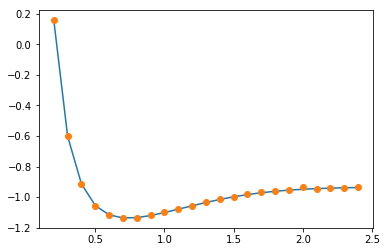

In [17]:
import numpy as np


x = [];e=[];fullci=[]

for bond_len in np.arange(0.2,2.5,0.1):
  m = get_molecule("{:.2}".format(bond_len))
  h = bravyi_kitaev(get_fermion_operator(m.get_molecular_hamiltonian()))
  runner = vqe.Vqe(UCCAnsatz(h,6,Circuit().x[0]))
  result = runner.run()
  x.append(bond_len)
  e.append(runner.ansatz.get_energy(result.circuit,runner.sampler))
  fullci.append(m.fci_energy)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,fullci)
plt.plot(x,e,"o")